Author: Joseph Do <br> Email: kd430@kent.ac.uk

In [ ]:
import pandas as pd

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 10000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('/content/drive/MyDrive/Kindle_Store_5.json.gz', compression='gzip', nrows=100000000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myDF = pd.concat(myList,axis=0)

In [ ]:
myDF.shape
myDF.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN
1,5,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN
2,5,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2.0,NaN


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Example dataset
data = {
    'review': ['Great product!', 'Worst purchase ever', 'Will buy again', 'Not worth the money', 'Excellent!'],
    'sentiment': [1, 0, 1, 0, 1]  # 1 for positive, 0 for negative
}
df = pd.DataFrame(data)

# Data preprocessing
tfidf = TfidfVectorizer(max_features=1000)
features = tfidf.fit_transform(df['review'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, df['sentiment'], test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

In [ ]:
# Import the library for sentiment analysis

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Operate the data cleaning process on dataframe directly

# Make sure the column 'reviewText' is of string type
myDF['reviewText'] = myDF['reviewText'].apply(str)
# Remove special characters
myDF['clean_review'] = myDF['reviewText'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myDF['clean_review'] = myDF['clean_review'].str.strip()

In [ ]:
# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 10000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_csv('/content/drive/MyDrive/compute_dataset.csv', nrows=100000000, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myDF1 = pd.concat(myList,axis=0)

In [ ]:
myDF1

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,clean_review,sentiment_score
0,4,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN,pretty good story a little exaggerated but I...,0.9824
1,5,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN,If you've read other max brand westerns you k...,0.4019
2,5,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN,Love Max always a fun twist,0.8176
3,5,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN,As usual for him a good book,0.4404
4,5,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2.0,NaN,MB is one of the original western writers and ...,0.8271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222978,3,False,"07 16, 2016",A3Q6HJYRJX87Z9,B01HJENY3Y,{'Format:': ' Kindle Edition'},Tokea,Ok book but some parts just didn't add up I fe...,Cool book,1468627200,NaN,NaN,Ok book but some parts just didn't add up I fe...,-0.2617
2222979,5,False,"07 12, 2016",A2O7HQNKCMOMUP,B01HJENY3Y,{'Format:': ' Kindle Edition'},Angela Burnett,Kia I loved this book. I am so glad that Sky ...,Crazy Read,1468281600,NaN,NaN,Kia I loved this book I am so glad that Sky ...,-0.9008
2222980,5,False,"07 1, 2016",A38NOWP7LQI8CM,B01HJENY3Y,{'Format:': ' Kindle Edition'},Treka22,This picks up where part one left off. Secret ...,Loved it,1467331200,NaN,NaN,This picks up where part one left off Secret ...,0.2500
2222981,5,False,"07 1, 2016",A1H9WGEEKVK0FM,B01HJENY3Y,{'Format:': ' Kindle Edition'},Adrienne Jeremiah,What a beautiful ending to such a twisted begi...,Beautiful ending,1467331200,NaN,NaN,What a beautiful ending to such a twisted begi...,0.8910


In [ ]:
# Define some functions for convenience

def getSentScore(text):
  myScore = sia.polarity_scores(text)['compound']
  return(myScore)

In [ ]:
# Generate a new column to store the compound scores

myDF['sentiment_score'] = myDF.apply(lambda x: getSentScore(x['clean_review']), axis=1)

In [ ]:
#code to save file to gg drive
path = '/content/drive/My Drive/compute_dataset.csv'


# Save the DataFrame to CSV in the specified path with an escape character
myDF.to_csv(path, index=False, escapechar='\\')

print(f"Dataset saved successfully to {path}")



Dataset saved successfully to /content/drive/My Drive/compute_dataset.csv


In [ ]:
# Take a look

myDF.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,clean_review,sentiment_score
0,4,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN,pretty good story a little exaggerated but I...,0.9824
1,5,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN,If you've read other max brand westerns you k...,0.4019
2,5,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN,Love Max always a fun twist,0.8176
3,5,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN,As usual for him a good book,0.4404
4,5,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2.0,NaN,MB is one of the original western writers and ...,0.8271


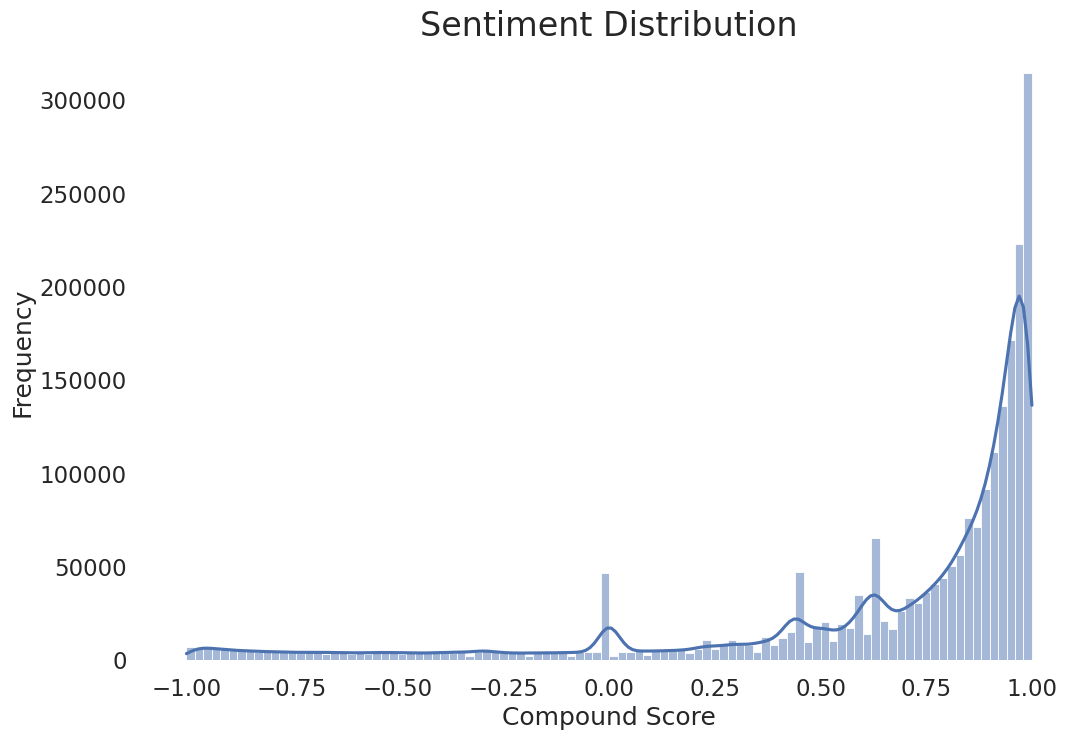

In [ ]:
# Visualise the result

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,8))

# Use histplot
sns.histplot(x="sentiment_score",
             data=myDF,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02
             )

# Add label to horiztontal axis
ax.set_xlabel("Compound Score")

# Remove ylabel
ax.set_ylabel("Frequency")

# Add a title
ax.set_title("Sentiment Distribution", fontsize = 24)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("sentDist.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

In [ ]:
score_count= myDF1['overall'].value_counts()
score_count

overall
5    1353641
4     556324
3     197949
2      66898
1      48171
Name: count, dtype: int64

### <font color=blue>Plot top 30 most frequent words separately for positive and negative tweets.</font>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get a bunch of tools from nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Get English stopwords
en_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Again we prepare the data

# Remove mentions
myDF['clean_tw'] = myDF['clean_review'].str.replace("@[\w]*","",regex=True)
# Remove http links
myDF['clean_tw'] = myDF['clean_tw'].str.replace("https?://[a-zA-Z0-9./]*","",regex=True)
# Remove special characters
myDF['clean_tw'] = myDF['clean_tw'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myDF['clean_tw'] = myDF['clean_tw'].str.strip()
# Restrict the length of the string
myDFLongTw = myDF[myDF['clean_tw'].str.len()>50]

In [ ]:
myDF.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,clean_review,sentiment_score,clean_tw
0,4,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN,pretty good story a little exaggerated but I...,0.9824,pretty good story a little exaggerated but I...
1,5,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN,If you've read other max brand westerns you k...,0.4019,If you've read other max brand westerns you k...
2,5,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN,Love Max always a fun twist,0.8176,Love Max always a fun twist
3,5,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN,As usual for him a good book,0.4404,As usual for him a good book
4,5,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2.0,NaN,MB is one of the original western writers and ...,0.8271,MB is one of the original western writers and ...


In [ ]:
# Get the words for positive sentiment

# Subset the data
myDataPos = myDFLongTw[myDFLongTw['overall']==5]
# Take the tweets
myTwPos = myDataPos['clean_tw']
# Make a single string
all_tw_pos = ' '.join(myTwPos)


In [ ]:
# Break to words
myWordsPos = word_tokenize(all_tw_pos)
# Remove stopwords and cases
myWordsPos_noSW_noCase = [word.lower() for word in myWordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDistPos = FreqDist(myWordsPos_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFPos = pd.DataFrame(fDistPos.most_common(30), columns=['word', 'frequency'])

In [ ]:
from collections import Counter
# Subset the data
myDataPos = myDF1[myDF1['overall']<=3]
# Take the tweets
myTwPos = myDataPos['clean_review']
# Make a single string
all_tw_pos = ' '.join(str(e) for e in myTwPos if e is not None and not pd.isna(e))
# Make a single string and convert to lowercase
all_tw_pos = all_tw_pos.lower()

# Remove words that are stop words or less than 4 characters long
# This is done in a generator expression for memory efficiency
filtered_words = (word for word in all_tw_pos.split() if word not in en_stopwords and len(word) > 3)

# Count word frequency directly without explicit tokenization
word_counts = Counter(filtered_words)

# Convert the result to a dataframe for visualization
df_word_frequencies = pd.DataFrame(word_counts.most_common(30), columns=['word', 'frequency'])


In [ ]:
# Get the words for negative sentiment

# Subset the data
myDataNeg = myDataLongTw[myDataLongTw['airline_sentiment']=='negative']
# Take the tweets
myTwNeg = myDataNeg['clean_tw']
# Make a single string
all_tw_neg = ' '.join(myTwNeg)
# Break to words
myWordsNeg = word_tokenize(all_tw_neg)
# Remove stopwords and cases
myWordsNeg_noSW_noCase = [word.lower() for word in myWordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDistNeg = FreqDist(myWordsNeg_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFNeg = pd.DataFrame(fDistNeg.most_common(30), columns=['word', 'frequency'])

In [ ]:
# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(1, 2,
                     figsize=(12,12)
                     )

# Barplot for positive tweets
sns.barplot(x="frequency",
            y="word",
            hue="word",
            data=myDFPos,
            palette="rocket",
            ax=ax[0]
            )

ax[0].set_title('Lower than 3',fontsize=25)
ax[0].set_ylabel('')

# Barplot for negative tweets
sns.barplot(x="frequency",
            y="word",
            hue="word",
            data=myDFNeg,
            palette="mako",
            ax=ax[1]
            )

ax[1].set_title('Negative',fontsize=25)
ax[1].set_ylabel('')

# Leave some space between subplots
# Try commenting it out
plt.subplots_adjust(wspace=0.8)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig('conditionalWordFreq.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

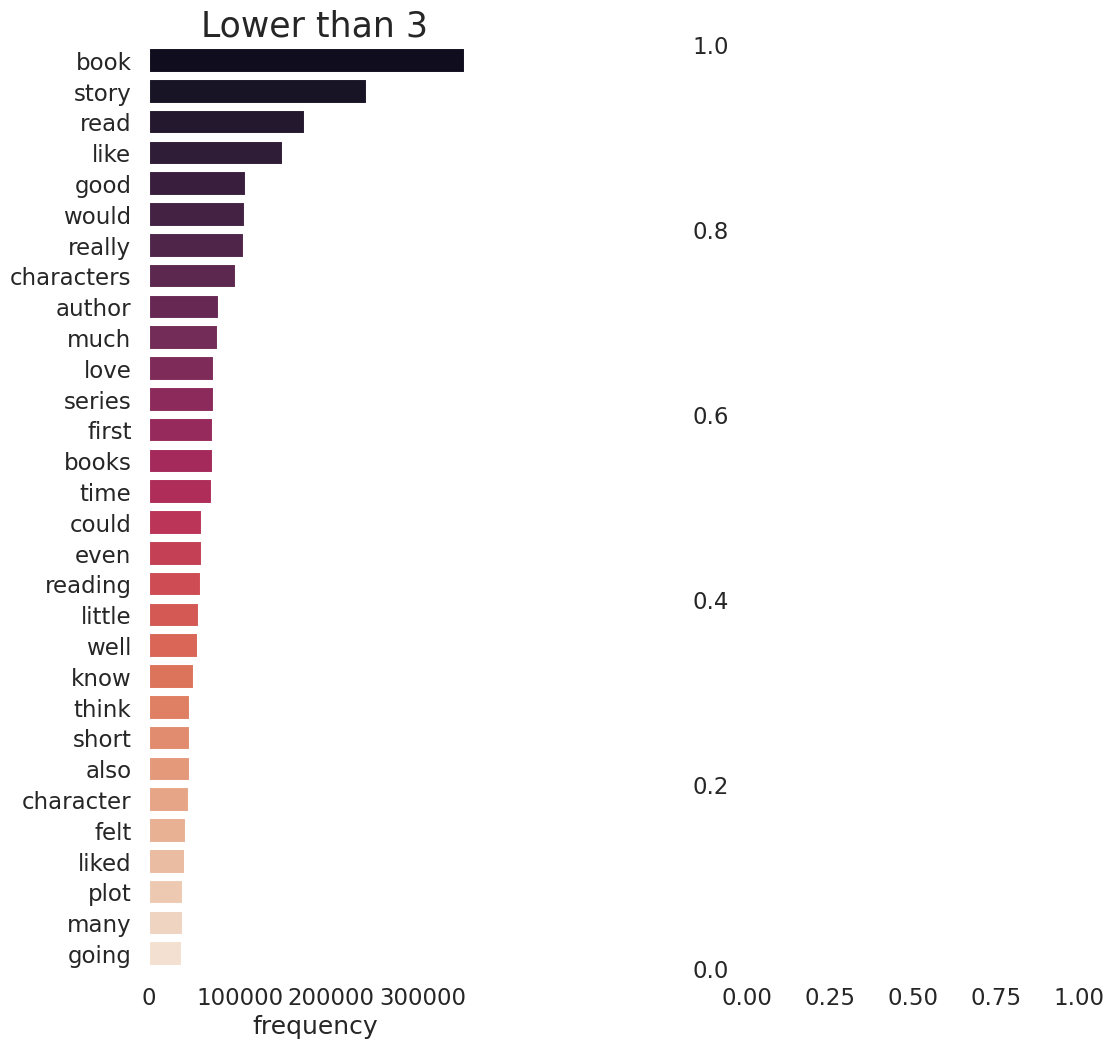

In [ ]:
# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(1, 2,
                     figsize=(12,12)
                     )

# Barplot for positive tweets
sns.barplot(x="frequency",
            y="word",
            hue="word",
            data=df_word_frequencies,
            palette="rocket",
            ax=ax[0]
            )

ax[0].set_title('Lower than 3',fontsize=25)
ax[0].set_ylabel('')
# Leave some space between subplots
# Try commenting it out
plt.subplots_adjust(wspace=0.8)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig('conditionalWordFreq.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

### <font color=blue>Apply the pretrained VADER sentiment classifier to a customer review text data and generate word clouds separately for positive and negative reviews.</font>

In [ ]:
# We repeat the data importing process in Exercise 9.0
# Import the library for sentiment analysis

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords

# Get English stopwords
en_stopwords = set(stopwords.words('english'))

# First upload a review data set to the runtime

# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 1000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('Magazine_Subscriptions_5.json.gz', compression='gzip', nrows=10000000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myData = pd.concat(myList,axis=0)

In [ ]:
# Operate the data cleaning process on dataframe directly

# Make sure the column 'reviewText' is of string type
myData['reviewText'] = myData['reviewText'].apply(str)
# Remove special characters
myData['clean_review'] = myData['reviewText'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myData['clean_review'] = myData['clean_review'].str.strip()

In [ ]:
# Define some functions for convenience

def getSentCat(text):
  myScore = sia.polarity_scores(text)['compound']
  if myScore > 0:
    myCat = 'positive'
  elif myScore < 0:
    myCat = 'negative'
  else:
    myCat = 'neutral'
  return(myCat)

In [ ]:
# Generate a new column to store the compound scores

myData['sentiment_cat'] = myData.apply(lambda x: getSentCat(x['clean_review']), axis=1)

In [ ]:
# Take a look

myData.head(5)

In [ ]:
# Get the words for positive sentiment

# Subset the data
myDataPos = myData[myData['sentiment_cat']=='positive']
# Take the reviews
myReviewPos = myDataPos['clean_review']
# Make a single string
all_review_pos = ' '.join(myReviewPos)
# Break to words
myWordsPos = word_tokenize(all_review_pos)
# Remove stopwords and cases
myWordsPos_noSW_noCase = [word.lower() for word in myWordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringPos = " ".join(myWordsPos_noSW_noCase)

In [ ]:
# Get the words for negative sentiment

# Subset the data
myDataNeg = myData[myData['sentiment_cat']=='negative']
# Take the reviews
myReviewNeg = myDataNeg['clean_review']
# Make a single string
all_review_neg = ' '.join(myReviewNeg)
# Break to words
myWordsNeg = word_tokenize(all_review_neg)
# Remove stopwords and cases
myWordsNeg_noSW_noCase = [word.lower() for word in myWordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringNeg = " ".join(myWordsNeg_noSW_noCase)

In [ ]:
# Use the package wordcloud
from wordcloud import WordCloud

# Set up the matplotlib figure
f, ax = plt.subplots(2, 1,
                     figsize=(12,12)
                     )

# Generate a word cloud for postive tweets
myCloudPos = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='mako'
                       ).generate(myStringPos)

ax[0].imshow(myCloudPos)
ax[0].set_title('Positive Reviews',fontsize=30)
ax[0].set_xlabel('')
ax[0].axis("off")

# Generate a word cloud for negtive tweets
myCloudNeg = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='rocket'
                       ).generate(myStringNeg)

ax[1].imshow(myCloudNeg)
ax[1].set_title('Negative Reviews',fontsize=30)
ax[1].set_xlabel('')
ax[1].axis("off")

# Save the figure
plt.savefig('conditionalWordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

## 1.&nbsp;Wrap-up of preliminary review data analysis

### <font color=blue>1.0 Data Preparation</font>

In [ ]:
import pandas as pd
import itertools

# Get a bunch of tools from nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist

# Import bigrams
from nltk import bigrams

# Get English stopwords
en_stopwords = set(stopwords.words('english'))

In [ ]:
# First upload a review data set to the runtime

# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 1000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('Magazine_Subscriptions_5.json.gz', compression='gzip', nrows=10000000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myData = pd.concat(myList,axis=0)

In [ ]:
# Operate the data cleaning process on dataframe directly

# Make sure the column 'reviewText' is of string type
myData['reviewText'] = myData['reviewText'].apply(str)
# Remove special characters
myData['clean_review'] = myData['reviewText'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myData['clean_review'] = myData['clean_review'].str.strip()

In [ ]:
# Define some functions for convenience

def getSentScore(text):
  myScore = sia.polarity_scores(text)['compound']
  return(myScore)

In [ ]:
# Define some functions for convenience

def getSentCat(text):
  myScore = sia.polarity_scores(text)['compound']
  if myScore > 0:
    myCat = 'positive'
  elif myScore < 0:
    myCat = 'negative'
  else:
    myCat = 'neutral'
  return(myCat)

In [ ]:
# Generate a new column to store the compound scores

myData['sentiment_score'] = myData.apply(lambda x: getSentScore(x['clean_review']), axis=1)

In [ ]:
# Generate a new column to store the compound scores

myData['sentiment_cat'] = myData.apply(lambda x: getSentCat(x['clean_review']), axis=1)

In [ ]:
# Take a look

myData.head(5)

In [ ]:
# Get the words for positive sentiment

# Subset the data
myDataPos = myData[myData['sentiment_cat']=='positive']
# Take the reviews
myReviewPos = myDataPos['clean_review']
# Make a single string
all_review_pos = ' '.join(myReviewPos)
# Break to words
myWordsPos = word_tokenize(all_review_pos)
# Remove stopwords and cases
myWordsPos_noSW_noCase = [word.lower() for word in myWordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDistPos = FreqDist(myWordsPos_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFPos = pd.DataFrame(fDistPos.most_common(30), columns=['word', 'frequency'])

# Make a single string again for word cloud
myStringPos = " ".join(myWordsPos_noSW_noCase)

# Generate lists of bigrams for network visualisation
myTokensPos = [word_tokenize(tweet) for tweet in myDataPos['clean_review']]
myTokensPos_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensPos]
myBigramPos = [list(bigrams(tweet)) for tweet in myTokensPos_noSW_noCase]
myBigramListPos = list(itertools.chain.from_iterable(myBigramPos))
bigramFreqPos = FreqDist(myBigramListPos)

In [ ]:
# Get the words for negative sentiment

# Subset the data
myDataNeg = myData[myData['sentiment_cat']=='negative']
# Take the reviews
myReviewNeg = myDataNeg['clean_review']
# Make a single string
all_review_neg = ' '.join(myReviewNeg)
# Break to words
myWordsNeg = word_tokenize(all_review_neg)
# Remove stopwords and cases
myWordsNeg_noSW_noCase = [word.lower() for word in myWordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDistNeg = FreqDist(myWordsNeg_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFNeg = pd.DataFrame(fDistNeg.most_common(30), columns=['word', 'frequency'])

# Make a single string again for word cloud
myStringNeg = " ".join(myWordsNeg_noSW_noCase)

# Generate lists of bigrams for network visualisation
myTokensNeg = [word_tokenize(tweet) for tweet in myDataNeg['clean_review']]
myTokensNeg_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensNeg]
myBigramNeg = [list(bigrams(tweet)) for tweet in myTokensNeg_noSW_noCase]
myBigramListNeg = list(itertools.chain.from_iterable(myBigramNeg))
bigramFreqNeg = FreqDist(myBigramListNeg)

### <font color=blue>1.1 Sentiment Scores Distribution</font>

In [ ]:
# Visualise the result

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,8))

# Use histplot
sns.histplot(x="sentiment_score",
             data=myData,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02
             )

# Add label to horiztontal axis
ax.set_xlabel("Compound Score")

# Remove ylabel
ax.set_ylabel("Frequency")

# Add a title
ax.set_title("Sentiment Distribution", fontsize = 24)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("sentDist.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

### <font color=blue>1.2 Most Frequent Words (bar chart)</font>

In [ ]:
# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(1, 2,
                     figsize=(12,12)
                     )

# Barplot for positive tweets
sns.barplot(x="frequency",
            y="word",
            hue="word",
            data=myDFPos,
            palette="rocket",
            ax=ax[0]
            )

ax[0].set_title('Positive',fontsize=25)
ax[0].set_ylabel('')

# Barplot for negative tweets
sns.barplot(x="frequency",
            y="word",
            hue="word",
            data=myDFNeg,
            palette="mako",
            ax=ax[1]
            )

ax[1].set_title('Negative',fontsize=25)
ax[1].set_ylabel('')

# Leave some space between subplots
# Try commenting it out
plt.subplots_adjust(wspace=0.8)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig('conditionalWordFreq.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

### <font color=blue>1.3 Most Frequent Words (word cloud)</font>

In [ ]:
# Use the package wordcloud
from wordcloud import WordCloud

# Set up the matplotlib figure
f, ax = plt.subplots(2, 1,
                     figsize=(12,12)
                     )

# Generate a word cloud for postive tweets
myCloudPos = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='mako'
                       ).generate(myStringPos)

ax[0].imshow(myCloudPos)
ax[0].set_title('Positive Reviews',fontsize=30)
ax[0].set_xlabel('')
ax[0].axis("off")

# Generate a word cloud for negtive tweets
myCloudNeg = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='rocket'
                       ).generate(myStringNeg)

ax[1].imshow(myCloudNeg)
ax[1].set_title('Negative Reviews',fontsize=30)
ax[1].set_xlabel('')
ax[1].axis("off")

# Save the figure
plt.savefig('conditionalWordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

### <font color=blue>1.4 Bigram Networks</font>

In [ ]:
# Prepare the bigram network

# We need some viz tools
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!sudo pip install pygraphviz

# We need networkx
import networkx as nx
import matplotlib.pyplot as plt

# For positive reviews

# Collect the result
myResultPos = bigramFreqPos.most_common(50)
# Construct the network
G_pos = nx.DiGraph()
# Create connections between nodes
for i in myResultPos:
    G_pos.add_edge(i[0][0], i[0][1], weight=(i[1]))

# For negative reviews

# Collect the result
myResultNeg = bigramFreqNeg.most_common(50)
# Construct the network
G_neg = nx.DiGraph()
# Create connections between nodes
for i in myResultNeg:
    G_neg.add_edge(i[0][0], i[0][1], weight=(i[1]))

In [ ]:
# Visualisation

import seaborn as sns

# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = nx.nx_agraph.graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews',fontsize=30)

# For negative subplot

# use another layout
pos_neg = nx.nx_agraph.graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()